In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Phase 1

In [49]:
reader = csv.reader(open("./data/phase1/data_fixed_l.csv", "r"))
next(reader)
data = [row for row in reader]
low = 0.2
q = [float(datum[0]) for datum in data]
lowpq = [float(datum[0]) for datum in data if float(datum[1]) <= low]
l80q = [float(datum[0]) for datum in data if int(datum[3]) == 80]
highpq = [float(datum[0]) for datum in data if float(datum[1]) >= 0.8]
p = [float(datum[1]) for datum in data]
lowp = [float(datum[1]) for datum in data if float(datum[1]) <= low]
l80p = [float(datum[1]) for datum in data if int(datum[3]) == 80]
v = [int(datum[2]) for datum in data]
lowpv = [int(datum[2]) for datum in data if float(datum[1]) <= low]
l80v = [int(datum[2]) for datum in data if int(datum[3]) == 80]
l = [int(datum[3]) for datum in data]
timeOnRoad = [float(datum[4]) for datum in data]
lowpTOR = [float(datum[4]) for datum in data if float(datum[1]) <= low]
l80TOR = [float(datum[4]) for datum in data if int(datum[3]) == 80]
highpTOR = [float(datum[4]) for datum in data if float(datum[1]) >= 0.8]
print("r^2 q: " + str(np.corrcoef(timeOnRoad, q)[0][1]**2*100) + "%")
print("r^2 p: " + str(np.corrcoef(timeOnRoad, p)[0][1]**2*100) + "%")
print("r^2 v: " + str(np.corrcoef(timeOnRoad, v)[0][1]**2*100) + "%")
print("r^2 l: " + str(np.corrcoef(timeOnRoad, l)[0][1]**2*100) + "%")
print("r^2 total: " + str(np.corrcoef(timeOnRoad, q)[0][1]**2*100 + np.corrcoef(timeOnRoad, p)[0][1]**2*100 + np.corrcoef(timeOnRoad, v)[0][1]**2*100 + np.corrcoef(timeOnRoad, l)[0][1]**2*100) + "%")
print("r^2 v with p <= 0.2: " + str(np.corrcoef(lowpTOR, lowpv)[0][1]**2*100) + "%")
print("r^2 q with p <= 0.2: " + str(np.corrcoef(lowpTOR, lowpq)[0][1]**2*100) + "%")
print("r^2 p with p <= 0.2: " + str(np.corrcoef(lowpTOR, lowp)[0][1]**2*100) + "%")
print("r^2 q with p >= 0.8: " + str(np.corrcoef(highpTOR, highpq)[0][1]**2*100) + "%")
print("r^2 v with l = 80: " + str(np.corrcoef(l80TOR, l80v)[0][1]**2*100) + "%")
print("r^2 q with l = 80: " + str(np.corrcoef(l80TOR, l80q)[0][1]**2*100) + "%")
print("r^2 p with l = 80: " + str(np.corrcoef(l80TOR, l80p)[0][1]**2*100) + "%")

r^2 q: 2.2399234803838737%
r^2 p: 58.69950893324809%
r^2 v: 5.6798417786243816%
r^2 l: nan%
r^2 total: nan%
r^2 v with p <= 0.2: 74.02953385102967%
r^2 q with p <= 0.2: 0.30070692600542975%
r^2 p with p <= 0.2: 1.5507690876481885%
r^2 q with p >= 0.8: 73.56860925409038%
r^2 v with l = 80: 5.6798417786243816%
r^2 q with l = 80: 2.2399234803838737%
r^2 p with l = 80: 58.69950893324809%


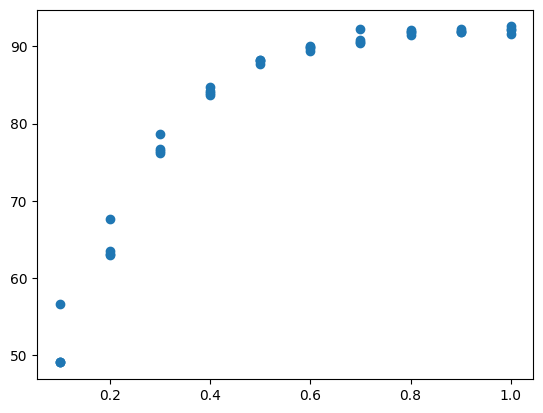

In [54]:
plt.scatter(highpq, highpTOR)
plt.savefig("./data/phase1/q_vs_timeOnRoad_l=80_highp.png")

# Phase 2

r^2 p: 99.24911446847051%


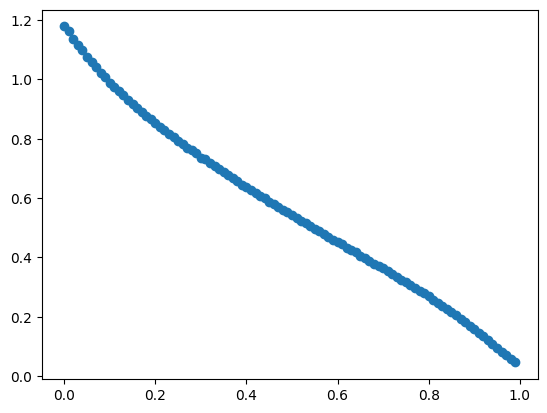

In [3]:
reader = csv.reader(open("./data/phase2/data.csv", "r"))
next(reader)
data = [row for row in reader]
p = [float(datum[0]) for datum in data]
v = [float(datum[1]) for datum in data]
print("r^2 p: " + str(np.corrcoef(v, p)[0][1]**2*100) + "%")
plt.scatter(p, v)
plt.savefig("./data/phase2/v_vs_p")

# Phase 3

r^2 p: 71.48779865251518%
r^2 t: 3.257573485161093%
r^2 t, p = 0.0: 50.40188929517534%


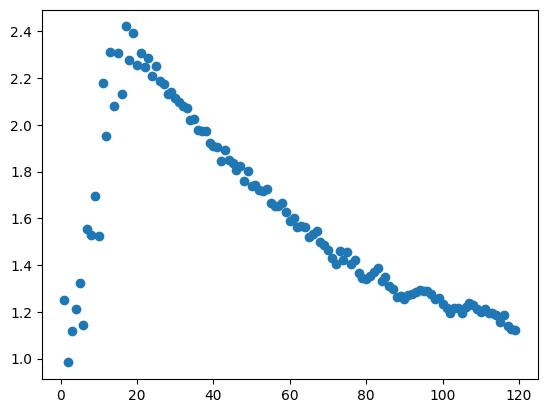

In [14]:
reader = csv.reader(open("./data/phase3/data.csv", "r"))
next(reader)
data = [row for row in reader]
currentp = 0.0
p = [float(datum[0]) for datum in data]
t = [float(datum[1]) for datum in data]
tp = [float(datum[1]) for datum in data if round(float(datum[0]), 1) == currentp]
v = [float(datum[2]) for datum in data]
vp = [float(datum[2]) for datum in data if round(float(datum[0]), 1) == currentp]
mqp = [float(datum[3]) for datum in data if round(float(datum[0]), 1) == currentp]
gqp = [float(datum[4]) for datum in data if round(float(datum[0]), 1) == currentp]
aqp = [float(datum[5]) for datum in data if round(float(datum[0]), 1) == currentp]
print("r^2 p: " + str(np.corrcoef(v, p)[0][1]**2*100) + "%")
print("r^2 t: " + str(np.corrcoef(v, t)[0][1]**2*100) + "%")
print("r^2 t, p = " + str(currentp) + ": " + str(np.corrcoef(vp, tp)[0][1]**2*100) + "%")
plt.scatter(tp, vp)
#plt.scatter(tp, mqp)
#plt.scatter(tp, gqp)
#plt.scatter(tp, aqp)
plt.savefig("./data/phase3/v_vs_t_p=" + str(currentp) + ".png")

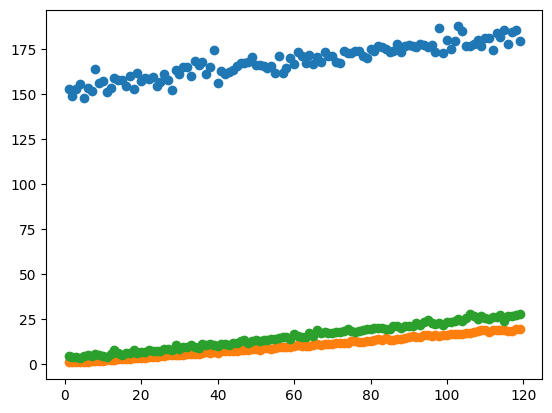

In [5]:
plt.scatter(tp, mqp)
plt.scatter(tp, gqp)
plt.scatter(tp, aqp)
plt.savefig("./data/phase3/queue_lengths_vs_t_p=" + str(currentp) + ".png")